

**Implement the Naive Bayes Algorithms in Python using Numpy and Pandas and Matplotlib.**


Here 3 funtions are Used:


1.   fit_naive_bayes(x_train, y_train).
2.   plot_decision_boundary(x_train, y_train, class_probabilities, feature_probabilities).
3.   plot_decision_boundary(x_train, y_train, class_probabilities, feature_probabilities).



In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
data = pd.read_csv('../data/train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

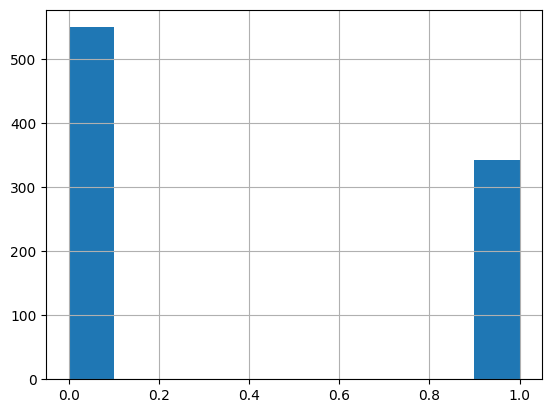

In [42]:
data["Survived"].hist()

here age is removed as it has empty Array

In [43]:
data = data[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Survived']]
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})
data = data.dropna()

<ipython-input-43-4451b0127ffb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})


In [44]:
x_train = data[['Pclass', 'Sex']].values
y_train = data['Survived'].values

In [45]:
def fit_naive_bayes(x_train, y_train):
    num_samples, num_features = x_train.shape
    num_classes = len(np.unique(y_train))
    
    # Calculate class probabilities
    class_probabilities = np.zeros(num_classes)
    for i in range(num_classes):
        class_probabilities[i] = np.sum(y_train == i) / num_samples
    
    # Calculate feature probabilities for each class
    feature_probabilities = np.zeros((num_classes, num_features))
    for i in range(num_classes):
        class_samples = x_train[y_train == i]
        for j in range(num_features):
            feature_values = np.unique(class_samples[:, j])
            for value in feature_values:
                numerator = np.sum(class_samples[:, j] == value)
                denominator = len(class_samples)
                feature_probabilities[i, j] += numerator / denominator
    
    return class_probabilities, feature_probabilities

In [46]:
def predict_naive_bayes(x_test, class_probabilities, feature_probabilities):
    num_samples, num_features = x_test.shape
    num_classes = class_probabilities.shape[0]
    predictions = np.zeros(num_samples, dtype=int)
    
    for i in range(num_samples):
        sample = x_test[i]
        class_scores = np.zeros(num_classes)
        
        for j in range(num_classes):
            feature_scores = np.zeros(num_features)
            
            for k in range(num_features):
                feature_value = sample[k]
                numerator = np.sum((x_train[:, k] == feature_value) & (y_train == j))
                denominator = np.sum(y_train == j)
                feature_scores[k] = numerator / denominator
            
            class_scores[j] = np.prod(feature_scores)
        
        predicted_class = np.argmax(class_scores)
        predictions[i] = predicted_class
    
    return predictions

In [47]:
def plot_decision_boundary(x_train, y_train, class_probabilities, feature_probabilities):
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    predictions = predict_naive_bayes(grid_points, class_probabilities, feature_probabilities)
    predictions = predictions.reshape(xx.shape)
    
    plt.contourf(xx, yy, predictions, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

In [48]:
class_probabilities, feature_probabilities = fit_naive_bayes(x_train, y_train)

In [49]:
np.random.seed(800)

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid_points = np.c_[xx.ravel(), yy.ravel()]

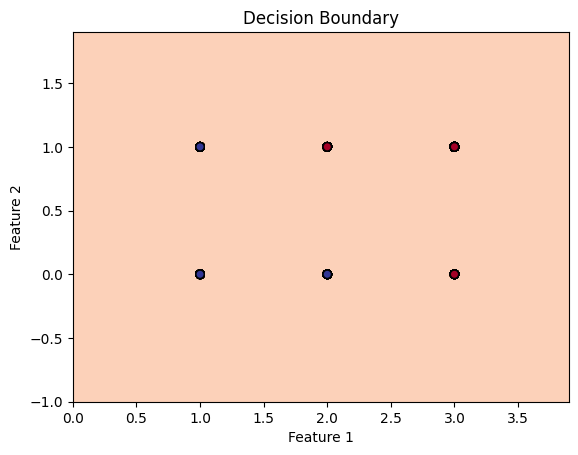

In [50]:
plot_decision_boundary(x_train, y_train, class_probabilities, feature_probabilities)